## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha
* Ver los fin de semanas
* Cuantos días pasaron desde el ultimo feriado y cuanto falta para el siguiente (?)
* Ver outliers en los feriados (o en los días)
* Maximos y minimos en los user_activities
* Diferenciar por pais

## Carga de librerías

In [589]:
# Probar con arbol con poda
# Probar con arbol sin poda pero corto
# Probar voting
# Probar varios KFolds en el de stacking

#Agregamos librerias a utilizar
import keras as keras
import pandas as pd
import xgboost as xgb
# import sklearn as sk
import numpy as np
from datetime import datetime

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#modelos y métricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, cross_validate
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', 40)

# import warnings
# warnings.simplefilter("ignore")

## Visualización de datos

In [590]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [591]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

### Primeros vistazos al dataset original

In [592]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


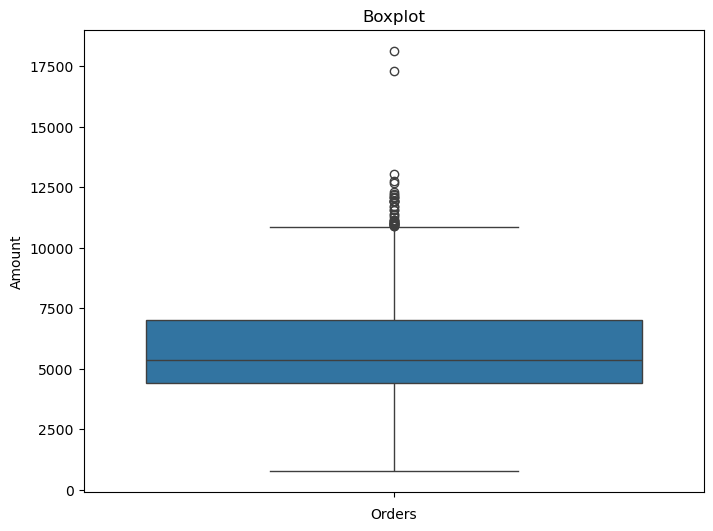

In [593]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [594]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [595]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [596]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [597]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [598]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor información -más precisa y más útil- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

#### Dataset limpio (para testear)

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [599]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change", "id"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

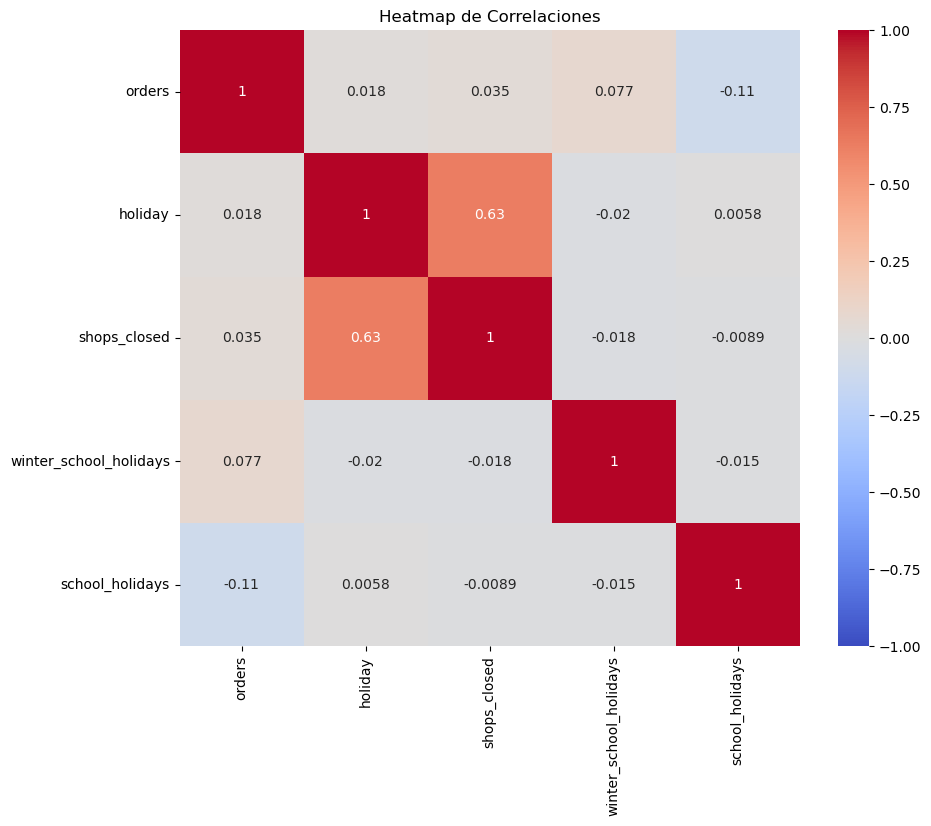

In [600]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

#### Dataset de (no) feriados

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [601]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

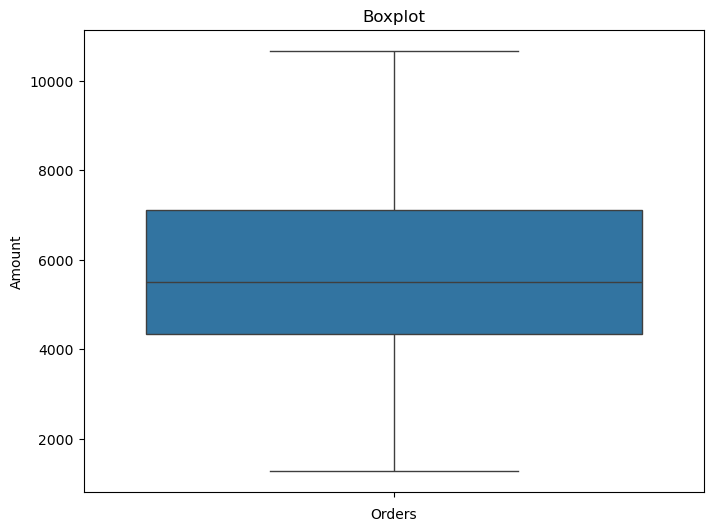

In [602]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

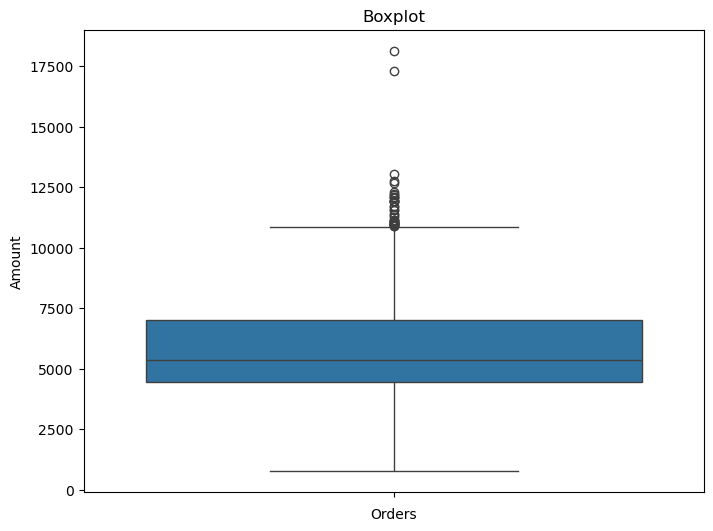

In [603]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

#### Dataset de sucursales

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [604]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_22706/4236548369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_22706/4236548369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [605]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


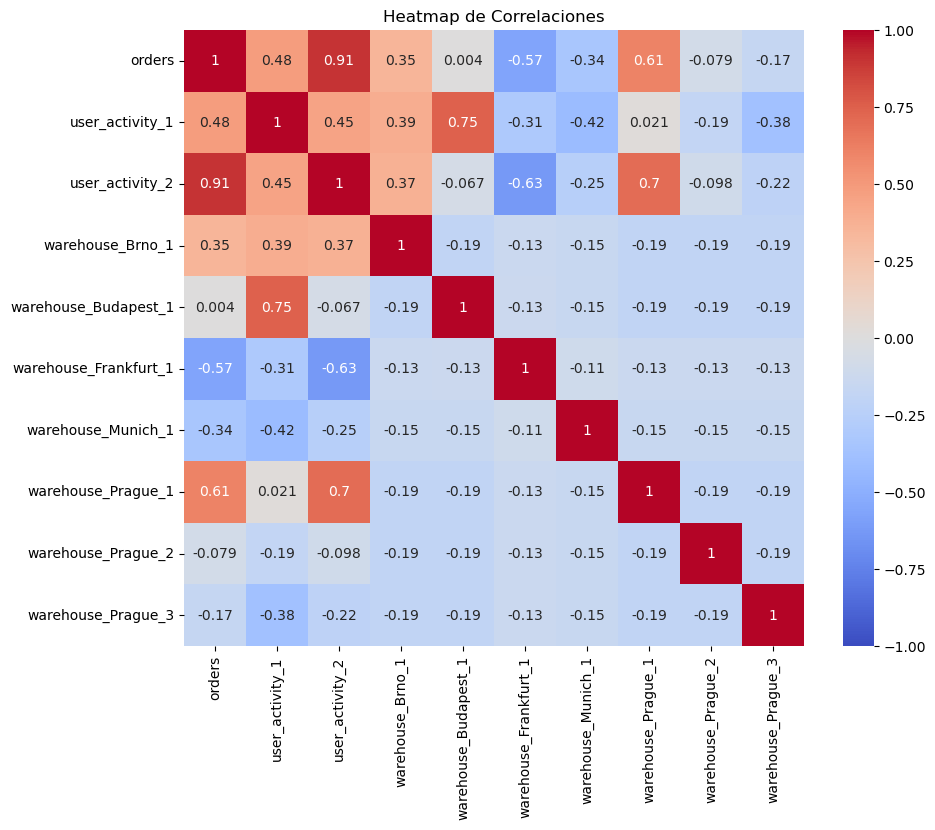

In [606]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [607]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

#### Dataset dias de la semana

Así como debe haber diferencia entre la cantidad de pedidos por día y sucursales en los días feriados y en los no feriados, también debe haberlo entre los días de la semana.

In [608]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [609]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

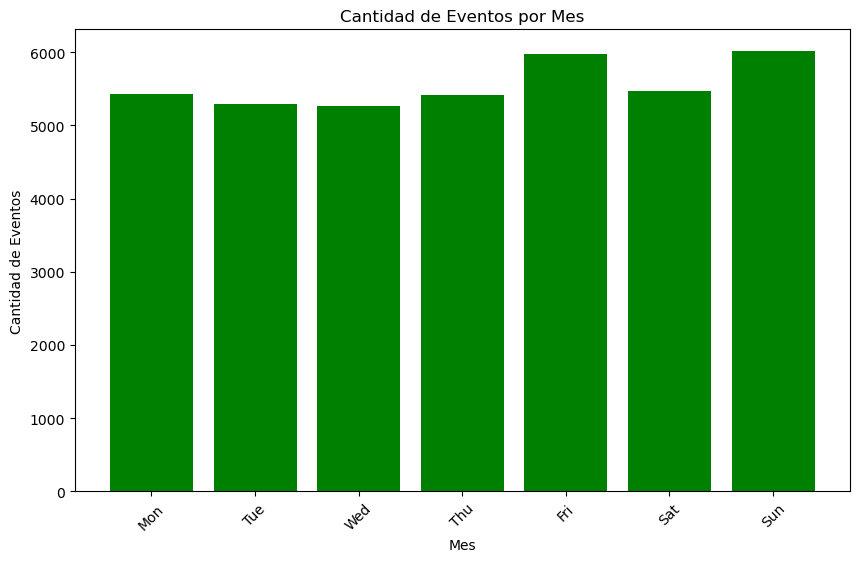

In [610]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

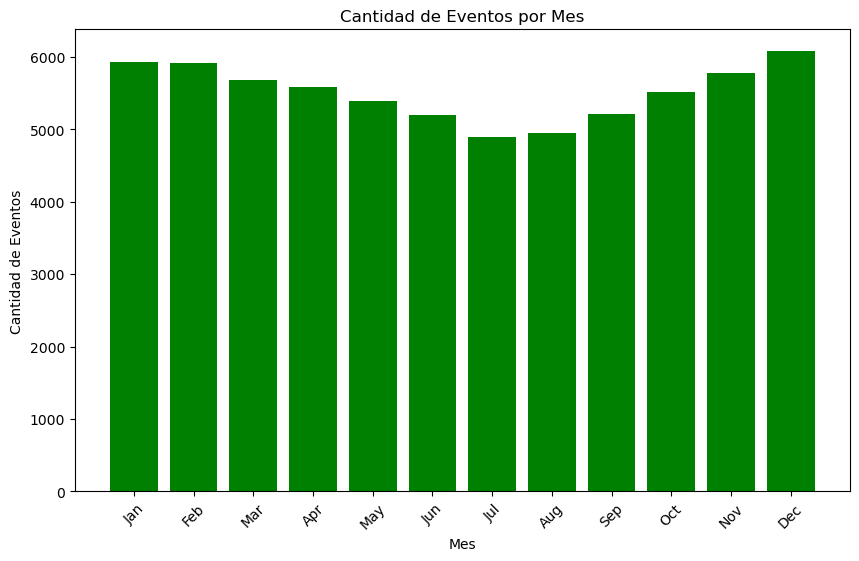

In [611]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [612]:
df_season = df_clean.copy()
df_season['fecha'] = pd.to_datetime(df['date'])

In [613]:
df_season["Season"] = df_season.fecha.dt.month_name()

In [614]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [615]:
df_season['Season'] = df_season.Season.apply(get_season)

In [616]:
df_seasons = pd.concat([df_clean['orders'], pd.get_dummies(df_season.Season).astype('int').add_prefix('Season_')], axis=1)

In [617]:
df_seasons

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


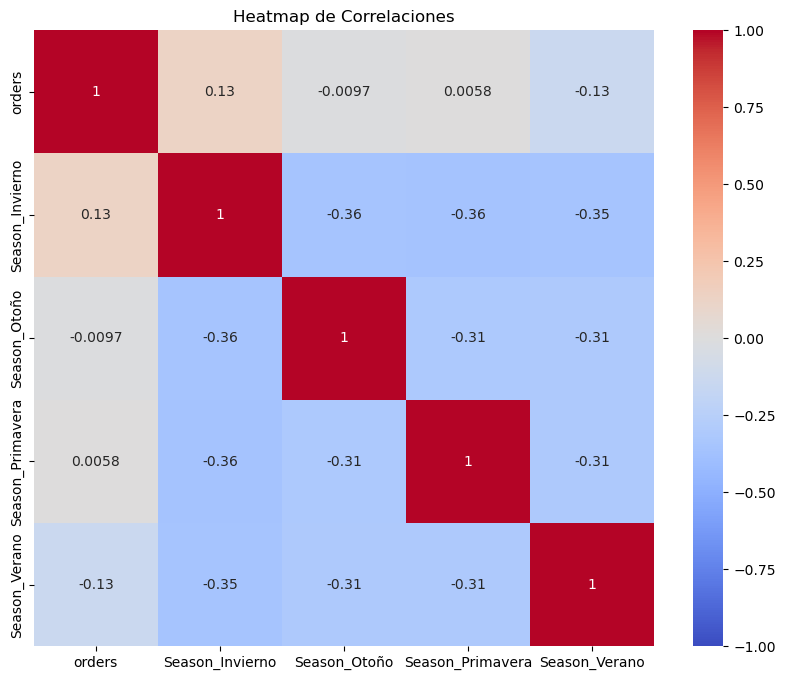

In [618]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [619]:
df_season['Hot'] = df_season.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [620]:
df_season

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,2024-03-13,Primavera,0


In [621]:
df_season.orders.corr(df_season.Hot)

-0.13284735461473357

In [622]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [623]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones

- Nos vamos con Warehouse importantes: warehouse_Brno_1, warehouse_Budapest_1, warehouse_Frankfurt_1, warehouse_Munich_1, warehouse_Prague_1, warehouse_Prague_2	y warehouse_Prague_3
- User activities mucha correlación
- Promedio de User activities por warehouse
- Si la fecha pertenece a temporada de calor. En invierno se encuentran valores mas altos
- School holiday tiene correlacion ""alta"" y holidays no

Columnas finales:
- warehouse_Brno-1 (binaria)
- warehouse_Budapest_1 (binaria)
- warehouse_Frankfurt_1 (bianria)
- warehouse_Munich_1 (binaria)
- warehouse_Prague_1 (binaria)
- warehouse_Prague_2 (binaria)
- warehouse_Prague_3 (binaria)
- Promedio user activities por warehouse (numerica)
- school holiday (binaria)
- Hot season (binaria)

## Feature Engineer

In [624]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'id'], axis = 1)
df_final

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,1722.0,32575.0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,1688.0,32507.0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,1696.0,32552.0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,1681.0,32423.0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,1704.0,32410.0
...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,2983.0,27111.0
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,2975.0,27133.0
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,2974.0,27151.0
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,2979.0,27180.0


In [625]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [626]:
df_final = df_final.sort_values(by = "date")

In [627]:
df_final_label = df_final.orders
df_final = df_final.drop(["orders"], axis=1)

# Separando el DataFrame en 80% y 20%
df_final_train, df_final_validation, df_final_train_label, df_final_validation_label = train_test_split(df_final,
                                                    df_final_label, 
                                                    test_size=0.2,
                                                    shuffle=False)

In [628]:
warehouses = df_final_train.warehouse

In [629]:
# mean user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
means_ua1= df_usact1.to_dict()

PROMEDIO_UA1 = df_usact1.mean()

# max user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].max()
max_ua1= df_usact1.to_dict()

# min user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].min()
min_ua1= df_usact1.to_dict()

In [630]:
# user activity 2
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

# max user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].max()
max_ua2= df_usact2.to_dict()

# min user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].min()
min_ua2= df_usact2.to_dict()

In [631]:
df_mean_encoding_warehouse = pd.concat([df_final_train, df_final_train_label], axis = 1)[["orders", 'warehouse']]
df_mean_encoding_warehouse = df_mean_encoding_warehouse.groupby("warehouse")["orders"].mean()
PROMEDIO_OPW = df_mean_encoding_warehouse.mean()
means_orders_per_warehouse= df_mean_encoding_warehouse.to_dict()

In [632]:
df_final_train['year_month_warehouse'] = df_final_train['date'].dt.month.astype(str) + '_' + df_final_train['warehouse']
df_mean_encoding_year_month_warehouse = pd.concat([df_final_train, df_final_train_label], axis = 1)[["orders", 'year_month_warehouse']]
df_mean_encoding_year_month_warehouse = df_mean_encoding_year_month_warehouse.groupby('year_month_warehouse')["orders"].mean()
PROMEDIO_YMW = df_mean_encoding_year_month_warehouse.mean()
means_y_m_w= df_mean_encoding_year_month_warehouse.to_dict()

In [633]:
means_orders_per_warehouse

{'Brno_1': 7009.977366255144,
 'Budapest_1': 5362.533546325879,
 'Frankfurt_1': 1409.5226244343892,
 'Munich_1': 2901.62292358804,
 'Prague_1': 8261.953703703704,
 'Prague_2': 4982.338477366256,
 'Prague_3': 4576.63309352518}

In [634]:
#Features relacionadas con la user activity
df_final_train["mean_user_activity_1"] = df_final_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
df_final_train["mean_user_activity_2"] = df_final_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
df_final_train["max_user_activity_1"] = df_final_train.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
df_final_train["max_user_activity_2"] = df_final_train.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
df_final_train["min_user_activity_1"] = df_final_train.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
df_final_train["min_user_activity_2"] = df_final_train.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
df_final_train["product_ua"] = df_final_train["mean_user_activity_1"] * df_final_train["mean_user_activity_2"]


#Mean encoding
df_final_train["mean_orders_per_warehouse"] = df_final_train.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
df_final_train['year_month_warehouse'] = df_final_train['date'].dt.month.astype(str) + '_' + df_final_train['warehouse']
df_final_train["means_year_month_warehouse"] = df_final_train.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
df_final_train['country'] = df_final_train['warehouse'].map(city_to_country)
df_final_train = pd.concat([df_final_train.drop(["country"], axis=1), pd.get_dummies(df_final_train.country).astype('int').add_prefix('country_')], axis=1)
df_final_train = pd.concat([df_final_train.drop(["warehouse"], axis=1), pd.get_dummies(df_final_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_train = df_final_train.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_train['hot_season'] = df_final_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
df_final_train['year'] = df_final_train['date'].dt.year
df_final_train['month'] = df_final_train['date'].dt.month
df_final_train['week'] = df_final_train['date'].dt.isocalendar().week
df_final_train['day'] = df_final_train['date'].dt.day
df_final_train['day_of_week'] = df_final_train['date'].dt.dayofweek #numero
# df_final_train['day_of_week'] = df_final_train['date'].dt.day_name() #cadena
df_final_train['year_sin'] = np.sin(2 * np.pi * df_final_train['year'])
#df_final_train['year_cos'] = np.cos(2 * np.pi * df_final_train['year'])
#df_final_train['month_sin'] = np.sin(2 * np.pi * df_final_train['month'] / 12) 
df_final_train['month_cos'] = np.cos(2 * np.pi * df_final_train['month'] / 12)
#df_final_train['week_sin'] = np.sin(2 * np.pi * df_final_train['week'] / 53)
df_final_train['week_cos'] = np.cos(2 * np.pi * df_final_train['week'] / 53)
#df_final_train['day_sin'] = np.sin(2 * np.pi * df_final_train['day'] / 31)
#df_final_train['day_cos'] = np.cos(2 * np.pi * df_final_train['day'] / 31)
#df_final_train['day_of_week_sin'] = np.sin(2 * np.pi * df_final_train['day_of_week'] / 7)
#df_final_train['day_of_week_cos'] = np.cos(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train["month_name"] = df_final_train.date.dt.month_name()
df_final_train['season'] = df_final_train.month_name.apply(get_season)
df_final_train = pd.concat([df_final_train, pd.get_dummies(df_final_train.season).astype('int').add_prefix('Season_')], axis=1)
df_final_train['group']=(df_final_train['year']-2020)*48+df_final_train['month']*4+df_final_train['day']//7

#drops
df_final_train = df_final_train.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse', 'user_activity_1', 'user_activity_2'], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)

df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     5872 non-null   int64  
 1   shops_closed                5872 non-null   int64  
 2   winter_school_holidays      5872 non-null   int64  
 3   school_holidays             5872 non-null   int64  
 4   mean_user_activity_1        5872 non-null   float64
 5   mean_user_activity_2        5872 non-null   float64
 6   max_user_activity_1         5872 non-null   float64
 7   max_user_activity_2         5872 non-null   float64
 8   min_user_activity_1         5872 non-null   float64
 9   min_user_activity_2         5872 non-null   float64
 10  product_ua                  5872 non-null   float64
 11  mean_orders_per_warehouse   5872 non-null   float64
 12  means_year_month_warehouse  5872 non-null   float64
 13  country_Czech Republic      5872 

In [635]:
warehouses_validation = df_final_validation.warehouse

In [636]:
#Features relacionadas con la user activity
df_final_validation["mean_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
df_final_validation["mean_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
df_final_validation["max_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
df_final_validation["max_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
df_final_validation["min_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
df_final_validation["min_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
df_final_validation["product_ua"] = df_final_validation["mean_user_activity_1"] * df_final_validation["mean_user_activity_2"]


#Mean encoding
df_final_validation["mean_orders_per_warehouse"] = df_final_validation.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
df_final_validation['year_month_warehouse'] = df_final_validation['date'].dt.month.astype(str) + '_' + df_final_validation['warehouse']
df_final_validation["means_year_month_warehouse"] = df_final_validation.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
df_final_validation['country'] = df_final_validation['warehouse'].map(city_to_country)
df_final_validation = pd.concat([df_final_validation.drop(["country"], axis=1), pd.get_dummies(df_final_validation.country).astype('int').add_prefix('country_')], axis=1)
df_final_validation = pd.concat([df_final_validation.drop(["warehouse"], axis=1), pd.get_dummies(df_final_validation.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_validation = df_final_validation.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_validation['hot_season'] = df_final_validation.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
df_final_validation['year'] = df_final_validation['date'].dt.year
df_final_validation['month'] = df_final_validation['date'].dt.month
df_final_validation['week'] = df_final_validation['date'].dt.isocalendar().week
df_final_validation['day'] = df_final_validation['date'].dt.day
df_final_validation['day_of_week'] = df_final_validation['date'].dt.dayofweek #numero
# df_final_validation['day_of_week'] = df_final_validation['date'].dt.day_name() #cadena
df_final_validation['year_sin'] = np.sin(2 * np.pi * df_final_validation['year'])
#df_final_validation['year_cos'] = np.cos(2 * np.pi * df_final_validation['year'])
#df_final_validation['month_sin'] = np.sin(2 * np.pi * df_final_validation['month'] / 12) 
df_final_validation['month_cos'] = np.cos(2 * np.pi * df_final_validation['month'] / 12)
#df_final_validation['week_sin'] = np.sin(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['week_cos'] = np.cos(2 * np.pi * df_final_validation['week'] / 53)
#df_final_validation['day_sin'] = np.sin(2 * np.pi * df_final_validation['day'] / 31)
#df_final_validation['day_cos'] = np.cos(2 * np.pi * df_final_validation['day'] / 31)
#df_final_validation['day_of_week_sin'] = np.sin(2 * np.pi * df_final_validation['day_of_week'] / 7)
#df_final_validation['day_of_week_cos'] = np.cos(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation["month_name"] = df_final_validation.date.dt.month_name()
df_final_validation['season'] = df_final_validation.month_name.apply(get_season)
df_final_validation = pd.concat([df_final_validation, pd.get_dummies(df_final_validation.season).astype('int').add_prefix('Season_')], axis=1)
df_final_validation['group']=(df_final_validation['year']-2020)*48+df_final_validation['month']*4+df_final_validation['day']//7

#drops
df_final_validation = df_final_validation.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse', 'user_activity_1', 'user_activity_2'], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

df_final_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     1468 non-null   int64  
 1   shops_closed                1468 non-null   int64  
 2   winter_school_holidays      1468 non-null   int64  
 3   school_holidays             1468 non-null   int64  
 4   mean_user_activity_1        1468 non-null   float64
 5   mean_user_activity_2        1468 non-null   float64
 6   max_user_activity_1         1468 non-null   float64
 7   max_user_activity_2         1468 non-null   float64
 8   min_user_activity_1         1468 non-null   float64
 9   min_user_activity_2         1468 non-null   float64
 10  product_ua                  1468 non-null   float64
 11  mean_orders_per_warehouse   1468 non-null   float64
 12  means_year_month_warehouse  1468 non-null   float64
 13  country_Czech Republic      1468 

In [637]:
df_final_train.means_year_month_warehouse.value_counts()

means_year_month_warehouse
7278.913978    93
4123.021505    93
4511.559140    93
6533.290323    93
8639.150538    93
               ..
1425.692308    26
1376.384615    26
1497.730769    26
1500.576923    26
1442.083333    24
Name: count, Length: 84, dtype: int64

In [638]:
df_for_corr = pd.concat([df_final_train, df_final_train_label], axis = 1).corr()
df_for_corr.orders = df_for_corr.orders.apply(lambda x: abs(x))
top_15_columns = list(df_for_corr.sort_values(by="orders", ascending=False).orders.head(18).index)
top_15_columns.pop(0)

'orders'

In [639]:
features_orders  = df_for_corr.sort_values(by="orders", ascending=False).orders
best_features = list(features_orders[features_orders > 0.1].index)
best_features.pop(0)

'orders'

In [640]:
df_for_corr.orders

holiday                       0.009638
shops_closed                  0.034429
winter_school_holidays        0.023137
school_holidays               0.092109
mean_user_activity_1          0.109684
mean_user_activity_2          0.163716
max_user_activity_1           0.094312
max_user_activity_2           0.154339
min_user_activity_1           0.112469
min_user_activity_2           0.182080
product_ua                    0.138452
mean_orders_per_warehouse     0.176179
means_year_month_warehouse    0.196173
country_Czech Republic        0.147928
country_Germany               0.220393
country_Hungary               0.038615
warehouse_Brno_1              0.045879
warehouse_Frankfurt_1         0.193218
warehouse_Munich_1            0.110045
warehouse_Prague_1            0.047365
hot_season                    0.245195
year_sin                      0.474401
month_cos                     0.258452
week_cos                      0.280161
Season_Invierno               0.250849
Season_Otoño             

In [641]:
all_columns = list(df_final_train.columns)

In [642]:
best_features

['group',
 'year_sin',
 'week_cos',
 'month_cos',
 'Season_Invierno',
 'hot_season',
 'Season_Verano',
 'country_Germany',
 'means_year_month_warehouse',
 'warehouse_Frankfurt_1',
 'min_user_activity_2',
 'mean_orders_per_warehouse',
 'mean_user_activity_2',
 'max_user_activity_2',
 'country_Czech Republic',
 'product_ua',
 'min_user_activity_1',
 'warehouse_Munich_1',
 'mean_user_activity_1']

In [643]:
column_order = best_features

In [644]:
# Reordenar las columnas del DataFrame según el orden deseado
df_final_validation = df_final_validation[column_order].round(5)
df_final_train = df_final_train[column_order].round(5)


In [645]:
df_final_train

,group,year_sin,week_cos,month_cos,Season_Invierno,hot_season,Season_Verano,country_Germany,means_year_month_warehouse,warehouse_Frankfurt_1,min_user_activity_2,mean_orders_per_warehouse,mean_user_activity_2,max_user_activity_2,country_Czech Republic,product_ua,min_user_activity_1,warehouse_Munich_1,mean_user_activity_1
0,48,-0.0,0.88966,1.0,1,0,0,0,8767.87209,0,30403.0,8261.95370,35952.60288,41952.0,1,6.017289e+07,1564.0,0,1673.67284
1,48,-0.0,0.88966,1.0,1,0,0,0,5268.20930,0,17799.0,4982.33848,20996.28189,24401.0,1,2.737446e+07,1248.0,0,1303.77675
2,48,-0.0,0.88966,1.0,1,0,0,0,4864.52326,0,16254.0,4576.63309,18871.90545,21411.0,1,1.804961e+07,914.0,0,956.42754
3,48,-0.0,0.88966,1.0,1,0,0,0,5482.44578,0,17478.0,5362.53355,21435.60277,24488.0,0,6.409022e+07,2921.0,0,2989.89563
4,48,-0.0,0.88966,1.0,1,0,0,0,7309.08140,0,25037.0,7009.97737,29416.39403,34040.0,1,6.837638e+07,2245.0,0,2324.43107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,176,-0.0,-0.86104,-0.5,0,1,1,0,7320.76471,0,30403.0,8261.95370,35952.60288,41952.0,1,6.017289e+07,1564.0,0,1673.67284
5868,176,-0.0,-0.86104,-0.5,0,1,1,0,4983.16667,0,17478.0,5362.53355,21435.60277,24488.0,0,6.409022e+07,2921.0,0,2989.89563
5869,176,-0.0,-0.86104,-0.5,0,1,1,0,4504.60294,0,17799.0,4982.33848,20996.28189,24401.0,1,2.737446e+07,1248.0,0,1303.77675
5870,177,-0.0,-0.79485,-0.5,0,1,1,0,4095.63768,0,16254.0,4576.63309,18871.90545,21411.0,1,1.804961e+07,914.0,0,956.42754


## XGboost

In [61]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80, 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}

In [743]:
# Configurar GridSearchCV
#grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [744]:
# Ejecutar la búsqueda de hiperparámetros
#grid_search.fit(df_final_train, df_final_train_label)

In [747]:
# Obtener los mejores parámetros
#best_params = grid_search.best_params_
#print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
#best_model = grid_search.best_estimator_

best_model = xgb.XGBRegressor(
    colsample_bytree=0.6,
    learning_rate=0.7,
    max_depth=2,
    n_estimators=200
)

best_model.fit(df_final_train, df_final_train_label)
# Hacer predicciones en el conjunto de prueba
y_pred = np.round(best_model.predict(df_final_validation))

# Evaluar el rendimiento del modelo
mse = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.13


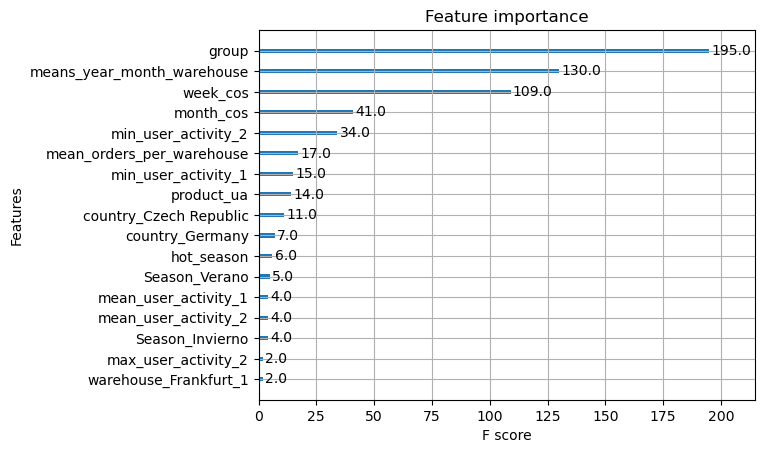

In [748]:
plot_importance(best_model)
plt.show()

In [ ]:
list(y_pred)

[5302.0,
 7477.0,
 1435.0,
 8548.0,
 5565.0,
 7477.0,
 1353.0,
 8410.0,
 5302.0,
 5327.0,
 2878.0,
 4546.0,
 8410.0,
 4546.0,
 3247.0,
 7477.0,
 5511.0,
 4930.0,
 1353.0,
 3409.0,
 5511.0,
 8410.0,
 4546.0,
 7326.0,
 1353.0,
 4784.0,
 4546.0,
 3247.0,
 1353.0,
 8548.0,
 5511.0,
 4930.0,
 7326.0,
 7097.0,
 4669.0,
 4328.0,
 7807.0,
 1353.0,
 3350.0,
 5327.0,
 8329.0,
 5327.0,
 6848.0,
 4475.0,
 4823.0,
 1387.0,
 8168.0,
 3342.0,
 4982.0,
 5644.0,
 4598.0,
 7224.0,
 1387.0,
 4598.0,
 5354.0,
 8164.0,
 7529.0,
 5535.0,
 3384.0,
 1387.0,
 4598.0,
 7129.0,
 8169.0,
 5354.0,
 5617.0,
 7243.0,
 3280.0,
 5563.0,
 4750.0,
 4982.0,
 1387.0,
 8381.0,
 7378.0,
 3443.0,
 5644.0,
 4527.0,
 8408.0,
 1387.0,
 5354.0,
 4598.0,
 7149.0,
 3443.0,
 5379.0,
 8169.0,
 1387.0,
 4836.0,
 4721.0,
 8168.0,
 7224.0,
 4527.0,
 1469.0,
 7243.0,
 5355.0,
 8168.0,
 3342.0,
 4687.0,
 5644.0,
 1387.0,
 5563.0,
 8381.0,
 4563.0,
 3280.0,
 5354.0,
 7224.0,
 5354.0,
 7243.0,
 4527.0,
 1387.0,
 3280.0,
 8164.0,
 5644.0,
 

In [ ]:
df_final_validation_label

3358     5020.0
2165     7319.0
5999     1565.0
972      8455.0
7125     5607.0
         ...   
2385    10777.0
4771     6408.0
1192    11917.0
3578     7140.0
6185     1916.0
Name: orders, Length: 1468, dtype: float64

## Redes Neuronales

In [198]:
# Escalar los datos
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_final_train)
df_validation_scaled = scaler.transform(df_final_validation)

Epoch 1/100
470/470 - 2s - loss: 23948452.0000 - val_loss: 5235061.5000 - 2s/epoch - 5ms/step
Epoch 2/100
470/470 - 1s - loss: 1297799.6250 - val_loss: 579749.3125 - 1s/epoch - 2ms/step
Epoch 3/100
470/470 - 1s - loss: 629409.7500 - val_loss: 464072.7188 - 1s/epoch - 2ms/step
Epoch 4/100
470/470 - 1s - loss: 534681.8125 - val_loss: 411547.7812 - 1s/epoch - 3ms/step
Epoch 5/100
470/470 - 1s - loss: 476096.6250 - val_loss: 378407.0625 - 1s/epoch - 2ms/step
Epoch 6/100
470/470 - 1s - loss: 435106.1250 - val_loss: 352203.2812 - 1s/epoch - 2ms/step
Epoch 7/100
470/470 - 1s - loss: 405674.2188 - val_loss: 340911.5000 - 1s/epoch - 3ms/step
Epoch 8/100
470/470 - 2s - loss: 384987.0625 - val_loss: 331667.5312 - 2s/epoch - 4ms/step
Epoch 9/100
470/470 - 1s - loss: 368937.5625 - val_loss: 323167.5625 - 1s/epoch - 3ms/step
Epoch 10/100
470/470 - 1s - loss: 358061.4375 - val_loss: 319802.5938 - 959ms/epoch - 2ms/step
Epoch 11/100
470/470 - 1s - loss: 349148.0938 - val_loss: 317807.5000 - 1s/epoch -

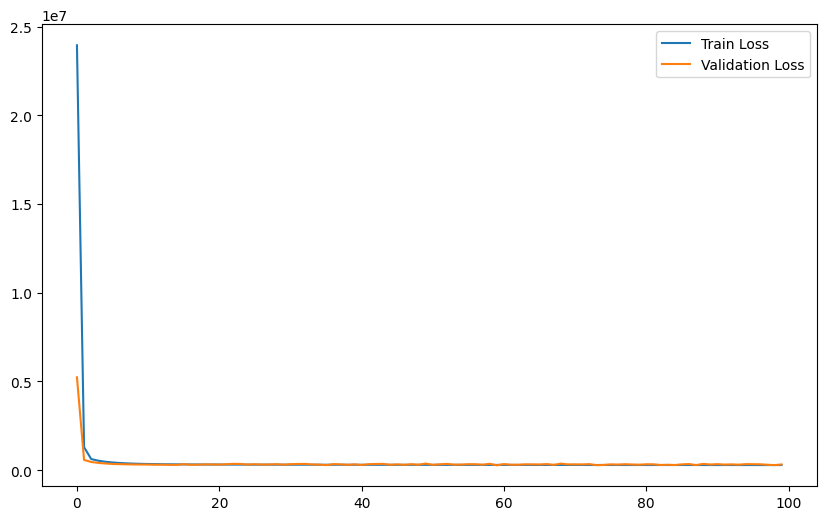

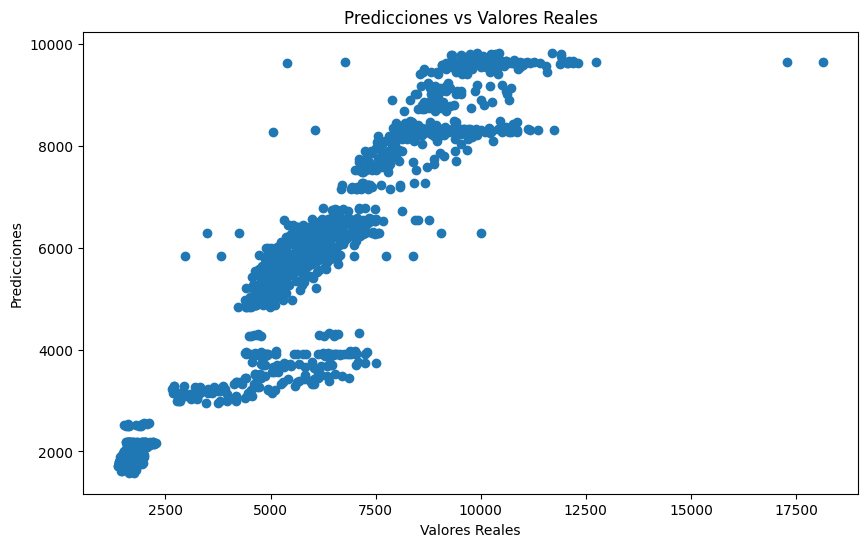

In [199]:
# Crear el modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=df_train_scaled.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

# Compilar el modelo
model_nn.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history = model_nn.fit(df_train_scaled, df_final_train_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model_nn.evaluate(df_validation_scaled, df_final_validation_label, verbose=2)
print(f'Test Loss: {loss}')

# Hacer predicciones
y_pred = model_nn.predict(df_validation_scaled)

# Calcular el error
mape = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Test MAPE: {mape}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(df_final_validation_label, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Modelo Random

In [797]:
scaler = StandardScaler()
df_final_train = pd.DataFrame(scaler.fit_transform(df_final_train), columns=df_final_train.columns)
df_final_validation = pd.DataFrame(scaler.fit_transform(df_final_validation), columns=df_final_validation.columns)

In [796]:
df_final_train

,group,year_sin,week_cos,month_cos,Season_Invierno,hot_season,Season_Verano,country_Germany,means_year_month_warehouse,warehouse_Frankfurt_1,min_user_activity_2,mean_orders_per_warehouse,mean_user_activity_2,max_user_activity_2,country_Czech Republic,product_ua,min_user_activity_1,warehouse_Munich_1,mean_user_activity_1
0,-1.889753,-0.0,1.290365,1.455368,1.676458,-1.092849,-0.594921,-0.465015,1.725893,-0.285306,1.397633,1.489476,1.602980,1.625902,0.714073,0.816130,-0.001716,-0.337982,0.032600
1,-1.889753,-0.0,1.290365,1.455368,1.676458,-1.092849,-0.594921,-0.465015,-0.052842,-0.285306,-0.022465,-0.200934,-0.228365,-0.248205,0.714073,-0.544162,-0.402514,-0.337982,-0.442558
2,-1.889753,-0.0,1.290365,1.455368,1.676458,-1.092849,-0.594921,-0.465015,-0.258019,-0.285306,-0.196540,-0.410046,-0.488487,-0.567479,0.714073,-0.930904,-0.826142,-0.337982,-0.888754
3,-1.889753,-0.0,1.290365,1.455368,1.676458,-1.092849,-0.594921,-0.465015,0.056045,-0.285306,-0.058632,-0.004970,-0.174572,-0.238915,-1.400418,0.978598,1.719434,-0.337982,1.723384
4,-1.889753,-0.0,1.290365,1.455368,1.676458,-1.092849,-0.594921,-0.465015,0.984450,-0.285306,0.793044,0.844171,0.802646,0.781054,0.714073,1.156364,0.862030,-0.337982,0.868546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,1.643871,-0.0,-1.154935,-0.633534,-0.596496,0.915039,1.680895,-0.465015,0.990388,-0.285306,1.397633,1.489476,1.602980,1.625902,0.714073,0.816130,-0.001716,-0.337982,0.032600
5868,1.643871,-0.0,-1.154935,-0.633534,-0.596496,0.915039,1.680895,-0.465015,-0.197718,-0.285306,-0.058632,-0.004970,-0.174572,-0.238915,-1.400418,0.978598,1.719434,-0.337982,1.723384
5869,1.643871,-0.0,-1.154935,-0.633534,-0.596496,0.915039,1.680895,-0.465015,-0.440952,-0.285306,-0.022465,-0.200934,-0.228365,-0.248205,0.714073,-0.544162,-0.402514,-0.337982,-0.442558
5870,1.671478,-0.0,-1.062484,-0.633534,-0.596496,0.915039,1.680895,-0.465015,-0.648812,-0.285306,-0.196540,-0.410046,-0.488487,-0.567479,0.714073,-0.930904,-0.826142,-0.337982,-0.888754


In [798]:


model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((df_final_validation.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(df_final_validation)
    test_model2_pred = model2.predict(df_final_validation)
    test_model3_pred = model3.predict(df_final_validation)
    test_model4_pred = model4.predict(df_final_validation)
    test_model5_pred = model5.predict(df_final_validation)
    test_model6_pred = model6.predict(df_final_validation)
    test_model7_pred = model7.predict(df_final_validation)
    test_model8_pred = model8.predict(df_final_validation)
    test_model9_pred = model9.predict(df_final_validation)
    test_model10_pred = model10.predict(df_final_validation)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 18
[LightGBM] [Info] Start training from score 5367.489887


/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052279
0:	learn: 1973.0894309	total: 2.23ms	remaining: 2.23s
1:	learn: 1879.9622404	total: 4.94ms	remaining: 2.46s
2:	learn: 1791.8774915	total: 7.46ms	remaining: 2.48s
3:	learn: 1710.5259981	total: 10.5ms	remaining: 2.62s
4:	learn: 1634.3311462	total: 16ms	remaining: 3.19s
5:	learn: 1561.9802619	total: 18.8ms	remaining: 3.12s
6:	learn: 1497.0681880	total: 20.8ms	remaining: 2.95s
7:	learn: 1431.0094625	total: 23.3ms	remaining: 2.89s
8:	learn: 1370.9494179	total: 25.5ms	remaining: 2.81s
9:	learn: 1314.6496918	total: 27.9ms	remaining: 2.76s
10:	learn: 1258.6730819	total: 30ms	remaining: 2.7s
11:	learn: 1207.8626426	total: 32ms	remaining: 2.63s
12:	learn: 1159.3769630	total: 33.9ms	remaining: 2.58s
13:	learn: 1112.7786871	total: 35.7ms	remaining: 2.52s
14:	learn: 1069.7593639	total: 37.7ms	remaining: 2.47s
15:	learn: 1028.0490789	total: 39.9ms	remaining: 2.46s
16:	learn: 989.6831330	total: 42.4ms	remaining: 2.45s
17:	learn: 954.8662184	total: 45.6ms	remaining: 2.49s

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052279
0:	learn: 1968.5372426	total: 1.69ms	remaining: 1.69s
1:	learn: 1875.9222654	total: 3.55ms	remaining: 1.77s
2:	learn: 1788.0313763	total: 5.59ms	remaining: 1.86s
3:	learn: 1707.1460348	total: 7.38ms	remaining: 1.84s
4:	learn: 1628.8745825	total: 9.27ms	remaining: 1.84s
5:	learn: 1555.8050197	total: 11.3ms	remaining: 1.87s
6:	learn: 1491.1348758	total: 12.7ms	remaining: 1.81s
7:	learn: 1426.4726706	total: 16.2ms	remaining: 2.01s
8:	learn: 1366.7331118	total: 17.9ms	remaining: 1.97s
9:	learn: 1313.1153078	total: 19.8ms	remaining: 1.96s
10:	learn: 1259.4615778	total: 21.7ms	remaining: 1.95s
11:	learn: 1209.6084872	total: 23.7ms	remaining: 1.95s
12:	learn: 1163.4094407	total: 25.6ms	remaining: 1.95s
13:	learn: 1116.9433979	total: 27.6ms	remaining: 1.94s
14:	learn: 1076.1334240	total: 29.9ms	remaining: 1.97s
15:	learn: 1038.3392746	total: 32.2ms	remaining: 1.98s
16:	learn: 1000.0361569	total: 34.4ms	remaining: 1.99s
17:	learn: 963.9484066	total: 36.3ms	remainin

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

mape = mean_absolute_percentage_error(df_final_validation_label, final_pred)
print(f'Final Model MAPE: {mape:.4f}')

Final Model MAPE: 0.1231


## Arbol de Regresión

In [365]:
# Spits que respeten la proporción de las clases
kfoldcv = KFold(n_splits=10, shuffle=True, random_state=42)
 
#Creo nuevo arbol
arbolcv=DecisionTreeRegressor()

#Selecciono métrica F1-Score
scorer_fn = make_scorer(mean_squared_error)

#Hago CV
results = cross_validate(arbolcv, df_final_train, df_final_train_label, cv = kfoldcv, scoring = scorer_fn, return_estimator=True)

In [366]:
metricsCV = results['test_score']
best_performance = results['estimator'][np.where(metricsCV == min(metricsCV))[0][0]]
print(metricsCV)

[299277.65079601 303682.70464664 320358.10683182 277518.68278582
 249257.66980835 238008.47493375 366806.88399962 326194.355212
 265264.79064368 316339.61970661]


In [367]:
#Importancia y reglas del Árbol con mejor Performance
sorted(list(zip(df_final_train.columns.to_list(), best_performance.feature_importances_)), key=lambda x: -x[1])[0:10]      

[('min_user_activity_2', 0.6221731431947051),
 ('mean_user_activity_1', 0.23234401013109868),
 ('means_year_month_warehouse', 0.08855380473204834),
 ('group', 0.04602710975172826),
 ('week_cos', 0.00810161341208711),
 ('month_cos', 0.0014308721618369088),
 ('mean_orders_per_warehouse', 0.000916415122505948),
 ('Season_Invierno', 0.00023909087234247144),
 ('min_user_activity_1', 9.735450214021618e-05),
 ('hot_season', 6.744567234147734e-05)]

In [368]:
#Predicción sobre el set de evaluacion
y_pred = np.round(best_performance.predict(df_final_validation))

In [369]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1167648.88


In [370]:
mape = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mape:.4f}')

Mean Squared Error: 0.1241


In [ ]:
df_final_validation_label - y_pred

## Train for Warehouse

In [646]:
df_final_train

,group,year_sin,week_cos,month_cos,Season_Invierno,hot_season,Season_Verano,country_Germany,means_year_month_warehouse,warehouse_Frankfurt_1,min_user_activity_2,mean_orders_per_warehouse,mean_user_activity_2,max_user_activity_2,country_Czech Republic,product_ua,min_user_activity_1,warehouse_Munich_1,mean_user_activity_1
0,48,-0.0,0.88966,1.0,1,0,0,0,8767.87209,0,30403.0,8261.95370,35952.60288,41952.0,1,6.017289e+07,1564.0,0,1673.67284
1,48,-0.0,0.88966,1.0,1,0,0,0,5268.20930,0,17799.0,4982.33848,20996.28189,24401.0,1,2.737446e+07,1248.0,0,1303.77675
2,48,-0.0,0.88966,1.0,1,0,0,0,4864.52326,0,16254.0,4576.63309,18871.90545,21411.0,1,1.804961e+07,914.0,0,956.42754
3,48,-0.0,0.88966,1.0,1,0,0,0,5482.44578,0,17478.0,5362.53355,21435.60277,24488.0,0,6.409022e+07,2921.0,0,2989.89563
4,48,-0.0,0.88966,1.0,1,0,0,0,7309.08140,0,25037.0,7009.97737,29416.39403,34040.0,1,6.837638e+07,2245.0,0,2324.43107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,176,-0.0,-0.86104,-0.5,0,1,1,0,7320.76471,0,30403.0,8261.95370,35952.60288,41952.0,1,6.017289e+07,1564.0,0,1673.67284
5868,176,-0.0,-0.86104,-0.5,0,1,1,0,4983.16667,0,17478.0,5362.53355,21435.60277,24488.0,0,6.409022e+07,2921.0,0,2989.89563
5869,176,-0.0,-0.86104,-0.5,0,1,1,0,4504.60294,0,17799.0,4982.33848,20996.28189,24401.0,1,2.737446e+07,1248.0,0,1303.77675
5870,177,-0.0,-0.79485,-0.5,0,1,1,0,4095.63768,0,16254.0,4576.63309,18871.90545,21411.0,1,1.804961e+07,914.0,0,956.42754


In [647]:
warehouses.value_counts()

warehouse
Prague_3       973
Prague_1       972
Prague_2       972
Brno_1         972
Budapest_1     939
Munich_1       602
Frankfurt_1    442
Name: count, dtype: int64

In [648]:
warehouses_validation.value_counts()

warehouse
Prague_2       221
Brno_1         221
Prague_1       221
Prague_3       220
Budapest_1     215
Frankfurt_1    187
Munich_1       183
Name: count, dtype: int64

In [649]:
unique_warehouses = list(warehouses.unique())
models_per_warehouse = []
models_warehouses = {}

In [650]:
df_final_train

,group,year_sin,week_cos,month_cos,Season_Invierno,hot_season,Season_Verano,country_Germany,means_year_month_warehouse,warehouse_Frankfurt_1,min_user_activity_2,mean_orders_per_warehouse,mean_user_activity_2,max_user_activity_2,country_Czech Republic,product_ua,min_user_activity_1,warehouse_Munich_1,mean_user_activity_1
0,48,-0.0,0.88966,1.0,1,0,0,0,8767.87209,0,30403.0,8261.95370,35952.60288,41952.0,1,6.017289e+07,1564.0,0,1673.67284
1,48,-0.0,0.88966,1.0,1,0,0,0,5268.20930,0,17799.0,4982.33848,20996.28189,24401.0,1,2.737446e+07,1248.0,0,1303.77675
2,48,-0.0,0.88966,1.0,1,0,0,0,4864.52326,0,16254.0,4576.63309,18871.90545,21411.0,1,1.804961e+07,914.0,0,956.42754
3,48,-0.0,0.88966,1.0,1,0,0,0,5482.44578,0,17478.0,5362.53355,21435.60277,24488.0,0,6.409022e+07,2921.0,0,2989.89563
4,48,-0.0,0.88966,1.0,1,0,0,0,7309.08140,0,25037.0,7009.97737,29416.39403,34040.0,1,6.837638e+07,2245.0,0,2324.43107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,176,-0.0,-0.86104,-0.5,0,1,1,0,7320.76471,0,30403.0,8261.95370,35952.60288,41952.0,1,6.017289e+07,1564.0,0,1673.67284
5868,176,-0.0,-0.86104,-0.5,0,1,1,0,4983.16667,0,17478.0,5362.53355,21435.60277,24488.0,0,6.409022e+07,2921.0,0,2989.89563
5869,176,-0.0,-0.86104,-0.5,0,1,1,0,4504.60294,0,17799.0,4982.33848,20996.28189,24401.0,1,2.737446e+07,1248.0,0,1303.77675
5870,177,-0.0,-0.79485,-0.5,0,1,1,0,4095.63768,0,16254.0,4576.63309,18871.90545,21411.0,1,1.804961e+07,914.0,0,956.42754


In [651]:
df_final_train = df_final_train.drop(["warehouse_Frankfurt_1", "warehouse_Munich_1", "country_Germany", "country_Czech Republic"], axis = 1)

In [655]:
df_final_train.size

99824

In [656]:
# Escalar los datos
unique_warehouses = list(warehouses.unique())
models_per_warehouse = []
scaler = MinMaxScaler()

df_final_train['warehouse'] = warehouses
df_final_train["orders"] = df_final_train_label
for warehouse in unique_warehouses:
   df_with_unique_warehouse = df_final_train[df_final_train.warehouse == warehouse].drop(['warehouse'], axis = 1)
   df_with_unique_warehouse_label = df_with_unique_warehouse.orders
   df_with_unique_warehouse = df_with_unique_warehouse.drop(['orders'], axis = 1)
   if df_with_unique_warehouse.size == 0:
      continue
   df_train_scaled_with_unique_warehouse = scaler.fit_transform(df_with_unique_warehouse)
   # Crear el modelo de red neuronal
   model_nn = Sequential()
   model_nn.add(Dense(64, input_dim=df_train_scaled.shape[1], activation='relu'))
   model_nn.add(Dense(32, activation='relu'))
   model_nn.add(Dense(1))

   # Compilar el modelo
   model_nn.compile(loss='mean_squared_error', optimizer='adam')

   # Entrenar el modelo
   history = model_nn.fit(df_train_scaled_with_unique_warehouse, df_with_unique_warehouse_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)
   models_warehouses[warehouse] = model_nn
   
   

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
78/78 - 4s - 47ms/step - loss: 67771712.0000 - val_loss: 74907392.0000
Epoch 2/100
78/78 - 0s - 5ms/step - loss: 66983932.0000 - val_loss: 73220712.0000
Epoch 3/100
78/78 - 0s - 5ms/step - loss: 63316936.0000 - val_loss: 67654640.0000
Epoch 4/100
78/78 - 0s - 6ms/step - loss: 54721428.0000 - val_loss: 56947860.0000
Epoch 5/100
78/78 - 0s - 5ms/step - loss: 41494332.0000 - val_loss: 42553576.0000
Epoch 6/100
78/78 - 0s - 4ms/step - loss: 26847416.0000 - val_loss: 28198054.0000
Epoch 7/100
78/78 - 0s - 5ms/step - loss: 15461698.0000 - val_loss: 18089450.0000
Epoch 8/100
78/78 - 0s - 5ms/step - loss: 9699356.0000 - val_loss: 12976916.0000
Epoch 9/100
78/78 - 0s - 5ms/step - loss: 7761853.5000 - val_loss: 10838436.0000
Epoch 10/100
78/78 - 0s - 5ms/step - loss: 7046794.5000 - val_loss: 9745634.0000
Epoch 11/100
78/78 - 0s - 5ms/step - loss: 6518804.5000 - val_loss: 9003399.0000
Epoch 12/100
78/78 - 0s - 5ms/step - loss: 6023734.5000 - val_loss: 8322254.0000
Epoch 13/100
78/78 -

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 - 3s - 39ms/step - loss: 24605670.0000 - val_loss: 27099754.0000
Epoch 2/100
78/78 - 0s - 5ms/step - loss: 24216122.0000 - val_loss: 26079776.0000
Epoch 3/100
78/78 - 0s - 4ms/step - loss: 22405966.0000 - val_loss: 22770770.0000
Epoch 4/100
78/78 - 0s - 4ms/step - loss: 18318426.0000 - val_loss: 16905272.0000
Epoch 5/100
78/78 - 1s - 9ms/step - loss: 12492666.0000 - val_loss: 10006031.0000
Epoch 6/100
78/78 - 0s - 5ms/step - loss: 6981708.0000 - val_loss: 4816475.0000
Epoch 7/100
78/78 - 1s - 8ms/step - loss: 3760917.7500 - val_loss: 2602857.2500
Epoch 8/100
78/78 - 0s - 6ms/step - loss: 2702075.5000 - val_loss: 2055322.1250
Epoch 9/100
78/78 - 0s - 5ms/step - loss: 2441211.2500 - val_loss: 1882635.5000
Epoch 10/100
78/78 - 0s - 5ms/step - loss: 2307082.5000 - val_loss: 1749694.3750
Epoch 11/100
78/78 - 0s - 5ms/step - loss: 2181115.5000 - val_loss: 1625275.2500
Epoch 12/100
78/78 - 0s - 4ms/step - loss: 2055391.8750 - val_loss: 1498275.7500
Epoch 13/100
78/78 - 0s - 5ms/step - l

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 - 3s - 36ms/step - loss: 20759806.0000 - val_loss: 22802582.0000
Epoch 2/100
78/78 - 0s - 5ms/step - loss: 20357150.0000 - val_loss: 21604348.0000
Epoch 3/100
78/78 - 0s - 5ms/step - loss: 18538988.0000 - val_loss: 17798784.0000
Epoch 4/100
78/78 - 0s - 4ms/step - loss: 14584377.0000 - val_loss: 11483338.0000
Epoch 5/100
78/78 - 0s - 4ms/step - loss: 9314829.0000 - val_loss: 5190471.0000
Epoch 6/100
78/78 - 0s - 5ms/step - loss: 4938594.5000 - val_loss: 2060650.1250
Epoch 7/100
78/78 - 1s - 6ms/step - loss: 2953406.2500 - val_loss: 1764914.5000
Epoch 8/100
78/78 - 0s - 4ms/step - loss: 2486883.0000 - val_loss: 1964073.8750
Epoch 9/100
78/78 - 0s - 5ms/step - loss: 2359619.7500 - val_loss: 2012811.3750
Epoch 10/100
78/78 - 1s - 7ms/step - loss: 2265365.2500 - val_loss: 1974582.5000
Epoch 11/100
78/78 - 0s - 6ms/step - loss: 2172617.5000 - val_loss: 1935750.1250
Epoch 12/100
78/78 - 0s - 5ms/step - loss: 2079123.6250 - val_loss: 1880083.0000
Epoch 13/100
78/78 - 0s - 5ms/step - los

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
78/78 - 3s - 42ms/step - loss: 48636380.0000 - val_loss: 53409736.0000
Epoch 2/100
78/78 - 0s - 5ms/step - loss: 48255484.0000 - val_loss: 52214836.0000
Epoch 3/100
78/78 - 0s - 5ms/step - loss: 46336060.0000 - val_loss: 47989408.0000
Epoch 4/100
78/78 - 0s - 5ms/step - loss: 41600548.0000 - val_loss: 39635444.0000
Epoch 5/100
78/78 - 0s - 4ms/step - loss: 33760252.0000 - val_loss: 27978292.0000
Epoch 6/100
78/78 - 1s - 7ms/step - loss: 24117450.0000 - val_loss: 15959598.0000
Epoch 7/100
78/78 - 0s - 6ms/step - loss: 15138235.0000 - val_loss: 7404224.5000
Epoch 8/100
78/78 - 0s - 5ms/step - loss: 9114702.0000 - val_loss: 3843600.5000
Epoch 9/100
78/78 - 0s - 5ms/step - loss: 6381951.5000 - val_loss: 3488777.5000
Epoch 10/100
78/78 - 0s - 5ms/step - loss: 5508818.0000 - val_loss: 3830194.7500
Epoch 11/100
78/78 - 0s - 6ms/step - loss: 5183548.5000 - val_loss: 3993264.5000
Epoch 12/100
78/78 - 0s - 6ms/step - loss: 4961980.5000 - val_loss: 3978313.5000
Epoch 13/100
78/78 - 0s

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
49/49 - 3s - 68ms/step - loss: 8542766.0000 - val_loss: 11091511.0000
Epoch 2/100
49/49 - 0s - 6ms/step - loss: 8486678.0000 - val_loss: 10974128.0000
Epoch 3/100
49/49 - 0s - 6ms/step - loss: 8302160.0000 - val_loss: 10641146.0000
Epoch 4/100
49/49 - 0s - 6ms/step - loss: 7857732.5000 - val_loss: 9943387.0000
Epoch 5/100
49/49 - 0s - 5ms/step - loss: 7044094.5000 - val_loss: 8796864.0000
Epoch 6/100
49/49 - 0s - 5ms/step - loss: 5870335.5000 - val_loss: 7266575.5000
Epoch 7/100
49/49 - 0s - 6ms/step - loss: 4489347.0000 - val_loss: 5538752.0000
Epoch 8/100
49/49 - 0s - 6ms/step - loss: 3144939.5000 - val_loss: 3960616.2500
Epoch 9/100
49/49 - 0s - 6ms/step - loss: 2143488.2500 - val_loss: 2787891.5000
Epoch 10/100
49/49 - 0s - 7ms/step - loss: 1572599.0000 - val_loss: 2090476.7500
Epoch 11/100
49/49 - 0s - 7ms/step - loss: 1324931.5000 - val_loss: 1752621.7500
Epoch 12/100
49/49 - 0s - 7ms/step - loss: 1235267.8750 - val_loss: 1592119.0000
Epoch 13/100
49/49 - 0s - 6ms/ste

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 - 3s - 111ms/step - loss: 1780521.6250 - val_loss: 2246374.7500
Epoch 2/100
26/26 - 0s - 9ms/step - loss: 1775870.8750 - val_loss: 2238064.7500
Epoch 3/100
26/26 - 0s - 9ms/step - loss: 1765583.5000 - val_loss: 2217529.7500
Epoch 4/100
26/26 - 0s - 9ms/step - loss: 1743244.5000 - val_loss: 2173913.0000
Epoch 5/100
26/26 - 0s - 8ms/step - loss: 1701210.2500 - val_loss: 2096223.1250
Epoch 6/100
26/26 - 0s - 10ms/step - loss: 1631324.8750 - val_loss: 1976695.0000
Epoch 7/100
26/26 - 0s - 8ms/step - loss: 1530206.5000 - val_loss: 1808971.0000
Epoch 8/100
26/26 - 0s - 9ms/step - loss: 1395707.8750 - val_loss: 1596641.0000
Epoch 9/100
26/26 - 0s - 9ms/step - loss: 1231528.1250 - val_loss: 1345360.5000
Epoch 10/100
26/26 - 0s - 9ms/step - loss: 1043034.9375 - val_loss: 1076311.2500
Epoch 11/100
26/26 - 0s - 8ms/step - loss: 847572.7500 - val_loss: 809074.8125
Epoch 12/100
26/26 - 0s - 9ms/step - loss: 662090.8125 - val_loss: 576964.8125
Epoch 13/100
26/26 - 0s - 9ms/step - loss: 508028.

In [658]:
unique_warehouses

['Prague_1',
 'Prague_2',
 'Prague_3',
 'Budapest_1',
 'Brno_1',
 'Munich_1',
 'Frankfurt_1']

In [657]:
models_per_warehouse

[<Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>]

## Submission

In [256]:
# Generamos un dataframe del dataset de entrenamiento
test =  pd.read_csv('test.csv')
test

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,NaN,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,NaN,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,NaN,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,NaN,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,NaN,0,0,0,0,Prague_1_2024-03-20
...,...,...,...,...,...,...,...,...
392,Budapest_1,2024-05-11,NaN,0,0,0,0,Budapest_1_2024-05-11
393,Budapest_1,2024-05-12,NaN,0,0,0,0,Budapest_1_2024-05-12
394,Budapest_1,2024-05-13,NaN,0,0,0,0,Budapest_1_2024-05-13
395,Budapest_1,2024-05-14,NaN,0,0,0,0,Budapest_1_2024-05-14


In [257]:
test['date'] = pd.to_datetime(test['date'])
test["mean_user_activity_1"] = test.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
test["mean_user_activity_2"] = test.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
test["max_user_activity_1"] = test.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
test["max_user_activity_2"] = test.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
test["min_user_activity_1"] = test.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
test["min_user_activity_2"] = test.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
test["product_ua"] = test["mean_user_activity_1"] * test["mean_user_activity_2"]
# test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))

#Mean encoding
test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
test['year_month_warehouse'] = test['date'].dt.month.astype(str) + '_' + test['warehouse']
test["means_year_month_warehouse"] = test.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

test['country'] = test['warehouse'].map(city_to_country)
test = pd.concat([test.drop(["country"], axis=1), pd.get_dummies(test.country).astype('int').add_prefix('country_')], axis=1)
test = pd.concat([test.drop(["warehouse"], axis=1), pd.get_dummies(test.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
test = test.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
test['hot_season'] = test.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek #numero
# test['day_of_week'] = test['date'].dt.day_name() #cadena
test['year_sin'] = np.sin(2 * np.pi * test['year'])
test['year_cos'] = np.cos(2 * np.pi * test['year'])
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12) 
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)
test['week_sin'] = np.sin(2 * np.pi * test['week'] / 53)
test['week_cos'] = np.cos(2 * np.pi * test['week'] / 53)
test['day_sin'] = np.sin(2 * np.pi * test['day'] / 31)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 31)
test['day_of_week_sin'] = np.sin(2 * np.pi * test['day_of_week'] / 7)
test['day_of_week_cos'] = np.cos(2 * np.pi * test['day_of_week'] / 7)
test["month_name"] = test.date.dt.month_name()
test['season'] = test.month_name.apply(get_season)
test = pd.concat([test, pd.get_dummies(test.season).astype('int').add_prefix('Season_')], axis=1) # tiene solo primavera
test['Season_Invierno'] = 0
test['Season_Verano'] = 0

test['group']=(test['year']-2020)*48+test['month']*4+test['day']//7

test = test.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse'], axis = 1)
test = test.reset_index().drop(["index"], axis = 1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     397 non-null    int64  
 1   shops_closed                397 non-null    int64  
 2   winter_school_holidays      397 non-null    int64  
 3   school_holidays             397 non-null    int64  
 4   id                          397 non-null    object 
 5   mean_user_activity_1        397 non-null    float64
 6   mean_user_activity_2        397 non-null    float64
 7   max_user_activity_1         397 non-null    float64
 8   max_user_activity_2         397 non-null    float64
 9   min_user_activity_1         397 non-null    float64
 10  min_user_activity_2         397 non-null    float64
 11  product_ua                  397 non-null    float64
 12  mean_orders_per_warehouse   397 non-null    float64
 13  means_year_month_warehouse  397 non

In [258]:
ids = test.id
test = test.drop(["id"], axis=1)

In [259]:
df_final_train.columns

Index(['group', 'year_sin', 'week_cos', 'month_cos', 'Season_Invierno',
       'hot_season', 'Season_Verano', 'country_Germany',
       'means_year_month_warehouse', 'warehouse_Frankfurt_1',
       'min_user_activity_2', 'mean_orders_per_warehouse',
       'mean_user_activity_2', 'max_user_activity_2', 'country_Czech Republic',
       'product_ua', 'min_user_activity_1', 'warehouse_Munich_1',
       'mean_user_activity_1'],
      dtype='object')

In [260]:
test = test[df_final_train.columns]

In [261]:
test

,group,year_sin,week_cos,month_cos,Season_Invierno,hot_season,Season_Verano,country_Germany,means_year_month_warehouse,warehouse_Frankfurt_1,min_user_activity_2,mean_orders_per_warehouse,mean_user_activity_2,max_user_activity_2,country_Czech Republic,product_ua,min_user_activity_1,warehouse_Munich_1,mean_user_activity_1
0,206,1.585375e-14,0.263587,6.123234e-17,0,1,0,0,8639.150538,0,30403.0,8261.953704,35952.602881,41952.0,1,6.017289e+07,1564.0,0,1673.672840
1,206,1.585375e-14,0.263587,6.123234e-17,0,1,0,0,8639.150538,0,30403.0,8261.953704,35952.602881,41952.0,1,6.017289e+07,1564.0,0,1673.672840
2,206,1.585375e-14,0.147647,6.123234e-17,0,1,0,0,8639.150538,0,30403.0,8261.953704,35952.602881,41952.0,1,6.017289e+07,1564.0,0,1673.672840
3,206,1.585375e-14,0.147647,6.123234e-17,0,1,0,0,8639.150538,0,30403.0,8261.953704,35952.602881,41952.0,1,6.017289e+07,1564.0,0,1673.672840
4,206,1.585375e-14,0.147647,6.123234e-17,0,1,0,0,8639.150538,0,30403.0,8261.953704,35952.602881,41952.0,1,6.017289e+07,1564.0,0,1673.672840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,213,1.585375e-14,-0.630088,-8.660254e-01,0,1,0,0,5379.383721,0,17478.0,5362.533546,21435.602769,24488.0,0,6.409022e+07,2921.0,0,2989.895634
393,213,1.585375e-14,-0.630088,-8.660254e-01,0,1,0,0,5379.383721,0,17478.0,5362.533546,21435.602769,24488.0,0,6.409022e+07,2921.0,0,2989.895634
394,213,1.585375e-14,-0.717507,-8.660254e-01,0,1,0,0,5379.383721,0,17478.0,5362.533546,21435.602769,24488.0,0,6.409022e+07,2921.0,0,2989.895634
395,214,1.585375e-14,-0.717507,-8.660254e-01,0,1,0,0,5379.383721,0,17478.0,5362.533546,21435.602769,24488.0,0,6.409022e+07,2921.0,0,2989.895634


In [262]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((test.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(test)
    test_model2_pred = model2.predict(test)
    test_model3_pred = model3.predict(test)
    test_model4_pred = model4.predict(test)
    test_model5_pred = model5.predict(test)
    test_model6_pred = model6.predict(test)
    test_model7_pred = model7.predict(test)
    test_model8_pred = model8.predict(test)
    test_model9_pred = model9.predict(test)
    test_model10_pred = model10.predict(test)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

KeyboardInterrupt: 

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [ ]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [ ]:
# Redes Neuronales
test_scaled = scaler.transform(test)
final_pred = [value[0] for value in model_nn.predict(test_scaled)]

13/13 [==============================] - 0s 3ms/step


In [ ]:
list(final_pred)

[9770.832,
 9770.832,
 9724.946,
 9724.946,
 9724.946,
 9735.713,
 9735.713,
 9735.713,
 9735.713,
 9689.007,
 9689.007,
 9689.007,
 9699.774,
 9699.774,
 9699.774,
 9699.774,
 9674.082,
 9674.082,
 9674.082,
 9674.082,
 9674.082,
 9674.082,
 9684.849,
 9638.473,
 9638.473,
 9638.473,
 9638.473,
 9638.473,
 9638.473,
 9649.238,
 9604.006,
 9604.006,
 9604.005,
 9604.005,
 9604.005,
 9604.005,
 9614.771,
 9571.318,
 9571.318,
 9571.318,
 9571.318,
 9571.318,
 9571.318,
 9582.085,
 9541.021,
 9541.021,
 9505.827,
 9505.827,
 9505.827,
 9505.827,
 9505.827,
 9467.729,
 9478.496,
 9478.496,
 9478.496,
 9478.496,
 9478.496,
 9478.496,
 9443.898,
 9454.665,
 9454.665,
 8432.45,
 8432.451,
 8386.564,
 8386.565,
 8386.565,
 8397.332,
 8397.332,
 8397.332,
 8397.332,
 8350.626,
 8350.626,
 8350.626,
 8361.393,
 8361.393,
 8361.393,
 8361.393,
 8359.384,
 8359.384,
 8359.384,
 8359.384,
 8359.384,
 8359.384,
 8370.151,
 8323.773,
 8323.773,
 8323.773,
 8323.773,
 8323.773,
 8323.773,
 8334.541,


In [ ]:
sub = pd.DataFrame({
    'id': ids,
    'orders': final_pred
})

In [ ]:
sub

,id,orders
0,Prague_1_2024-03-16,9770.832031
1,Prague_1_2024-03-17,9770.832031
2,Prague_1_2024-03-18,9724.946289
3,Prague_1_2024-03-19,9724.946289
4,Prague_1_2024-03-20,9724.946289
...,...,...
392,Budapest_1_2024-05-11,6532.010742
393,Budapest_1_2024-05-12,6532.010742
394,Budapest_1_2024-05-13,6501.582520
395,Budapest_1_2024-05-14,6512.862793


In [ ]:
# Escribir el DataFrame a un archivo CSV
sub.to_csv('submission_nn.csv', index=False)
